In [ ]:
## EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import plotly.express as px
%matplotlib inline

plt.rcParams["font.family"] = 'naummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [5]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [6]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.31'

## 나스닥 지수 탑100 상장기업

In [7]:
nas = fdr.StockListing('NASDAQ')
nas[:101]

100%|██████████| 3679/3679 [00:10<00:00, 365.79it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
...,...,...,...,...
96,PCAR,Paccar Inc,"건설장비 및 대형차, 기차, 배",521020
97,XLNX,Xilinx Inc,반도체 및 반도체 장비,571010
98,BGNE,Beigene Ltd ADR,생명과학 및 메디컬 리서치,562020
99,TTD,Trade Desk Inc Class A,소프트웨어 및 IT서비스,572010



## 나스닥 지수 탑100 상장기업 일일 NASDAQ 지수

In [8]:
nas_list = nas["Symbol"][:100]
todaylist=[]
cnt=0
for i in nas_list:
    data = fdr.DataReader('{}'.format(i),'2021-03-30','2021-03-31').reset_index().to_dict("records")[0]
    data["ticker"] = i
    todaylist.append(data)
    cnt+=1
    print(i)
result = pd.DataFrame(todaylist)
result

AAPL
MSFT
AMZN
FB
GOOGL
GOOG
TSLA
NVDA
PYPL
ASML
INTC
CMCSA
NFLX
ADBE
CSCO
PEP
AVGO
TXN
PDD
TMUS
COST
QCOM
ZIONO
AMGN
JD
CHTR
ZIONN
AZN
AMAT
SBUX
SNY
ABNB
INTU
MU
AMD
BKNG
ZM
LRCX
ISRG
GILD
MDLZ
FISV
ADP
BIDU
MELI
ATVI
CME
CSX
NTES
ADSK
WDAY
EQIX
ADI
NXPI
ILMN
TEAM
VRTX
KLAC
MRNA
VOD
REGN
KHC
KDP
MNST
MAR
WBA
ALGN
MCHP
ROST
EBAY
EXC
ROKU
BILI
AEP
BIIB
CRWD
CTSH
IDXX
ERIC
DOCU
EA
TROW
CDNS
LULU
SNPS
MTCH
CTAS
XEL
PAYX
ORLY
DXCM
TSCAP
CSGP
ALXN
MRVL
PTON
PCAR
XLNX
BGNE
TTD


,Date,Close,Open,High,Low,Volume,Change,ticker
0,2021-03-30,119.90,120.04,120.36,118.88,85670000.0,-0.0123,AAPL
1,2021-03-30,231.85,233.58,233.73,231.12,24790000.0,-0.0144,MSFT
2,2021-03-30,3055.29,3068.99,3069.66,3034.70,2340000.0,-0.0066,AMZN
3,2021-03-30,288.00,289.87,292.47,286.71,17470000.0,-0.0097,FB
4,2021-03-30,2046.47,2049.80,2061.99,2036.46,1370000.0,0.0003,GOOGL
...,...,...,...,...,...,...,...,...
95,2021-03-30,107.17,104.48,107.44,101.92,4200000.0,0.0205,PTON
96,2021-03-30,93.32,93.10,93.63,92.59,1210000.0,0.0014,PCAR
97,2021-03-30,120.30,120.50,120.58,118.42,1590000.0,-0.0158,XLNX
98,2021-03-30,332.99,323.00,338.44,320.55,297720.0,0.0292,BGNE


In [ ]:
nas.drop(columns=[S"level_0", "index"], inplace=True)

## 나스닥 지수 탑100 상장기업 일일 상세정보, NASDQA지수 종합( :: 시장 Close 기준)

In [21]:
nasd=pd.merge(result, nas, left_on="ticker", right_on="Symbol").sort_values(["Close"],ascending=False)
nasd.to_csv("./edg/chdatas/SYMB_NASDAQ.csv",encoding='utf-8-sig')
nasd

,Date,Close,Open,High,Low,Volume,Change,ticker,Symbol,Name,Industry,IndustryCode
2,2021-03-30,3055.29,3068.99,3069.66,3034.70,2340000.0,-0.0066,AMZN,AMZN,Amazon.com Inc,다양한 소매업,534020
35,2021-03-30,2334.90,2343.30,2370.20,2316.80,246370.0,-0.0070,BKNG,BKNG,Booking Holdings Inc,호텔 및 엔터테인먼트,533010
5,2021-03-30,2055.54,2060.40,2069.00,2044.03,1040000.0,-0.0002,GOOG,GOOG,Alphabet Inc Class C,소프트웨어 및 IT서비스,572010
4,2021-03-30,2046.47,2049.80,2061.99,2036.46,1370000.0,0.0003,GOOGL,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
44,2021-03-30,1428.03,1408.76,1444.00,1390.38,408150.0,0.0175,MELI,MELI,Mercadolibre Inc,소프트웨어 및 IT서비스,572010
...,...,...,...,...,...,...,...,...,...,...,...,...
22,2021-03-30,27.65,26.86,27.91,26.86,3100.0,0.0025,ZIONO,ZIONO,Zions Bancorporation NA ADR,은행,551010
91,2021-03-30,25.93,25.93,25.93,25.93,710.0,-0.0104,TSCAP,TSCAP,TriState Capital Holdings Inc ADR,은행,551010
26,2021-03-30,25.85,25.91,26.16,25.65,2200.0,0.0066,ZIONN,ZIONN,Zions Bancorporation NA ADR,은행,551010
59,2021-03-30,18.58,18.53,18.67,18.50,2830000.0,0.0038,VOD,VOD,Vodafone Group PLC ADR,통신 서비스,574010


### CLOSE 기준 100SYMBALL  정보 한눈에 알아보기

In [22]:
fig = px.histogram(x= nasd['Close'], title='21년 03월 30 ~ 21년 03월 31일 SYSBOL별 COLSE NASDQA지수 ')
fig.show()

In [199]:
#하나의 심볼 기간전체 데이터 가져오기
AAPL = fdr.DataReader('AAPL', '2000-01-01','2021-03-31')
MSFT = fdr.DataReader('MSFT', '2000-01-01','2021-03-30')
VOD = fdr.DataReader('VOD','2000-01-01','2021-03-31')
ERIC = fdr.DataReader('ERIC','2000-01-01','2021-03-30')
AMGN = fdr.DataReader('AMGN','2000-01-01','2021-03-30')
ADSK = fdr.DataReader('ADSK','2000-01-01','2021-03-31')
len(AAPL),len(MSFT),len(VOD),len(ERIC),len(AMGN),len(ADSK)

# #소프트웨어 및 IT 서비스
GOOG = fdr.DataReader('GOOG', '2000-01-01','2021-03-31')
GOOGL= fdr.DataReader('GOOGL', '2000-01-01','2021-03-31')
MELI = fdr.DataReader('MELI', '2000-01-01','2021-03-31')
#CSGP= fdr.DataReader('CSGP', '2000-01-01','2021-03-31')
TTD = fdr.DataReader('TTD', '2000-01-01','2021-03-31')
NFLX = fdr.DataReader('NFLX', '2000-01-01','2021-03-31')
ADBE = fdr.DataReader('ADBE', '2000-01-01','2021-03-31')
INTU = fdr.DataReader('INTU', '2000-01-01','2021-03-31')
ZM = fdr.DataReader('ZM', '2000-01-01','2021-03-31')
FB = fdr.DataReader('FB', '2000-01-01','2021-03-31')
ADSK = fdr.DataReader('ADSK', '2000-01-01','2021-03-31')
WDAY = fdr.DataReader('WDAY', '2000-01-01','2021-03-31')
SNPS = fdr.DataReader('SNPS', '2000-01-01','2021-03-31')
PYPL = fdr.DataReader('PYPL', '2000-01-01','2021-03-31')
MSFT = fdr.DataReader('MSFT', '2000-01-01','2021-03-31')
BIDU = fdr.DataReader('BIDU', '2000-01-01','2021-03-31')
TEAM = fdr.DataReader('TEAM', '2000-01-01','2021-03-31')
DOCU = fdr.DataReader('DOCU', '2000-01-01','2021-03-31')
ADP = fdr.DataReader('ADP', '2000-01-01','2021-03-31')
ABNB = fdr.DataReader('ABNB', '2000-01-01','2021-03-31')
CRWD = fdr.DataReader('CRWD', '2000-01-01','2021-03-31')
PDD = fdr.DataReader('PDD', '2000-01-01','2021-03-31')
EA = fdr.DataReader('EA', '2000-01-01','2021-03-31')
MTCH = fdr.DataReader('MTCH', '2000-01-01','2021-03-31')
CDNS = fdr.DataReader('CDNS', '2000-01-01','2021-03-31')
BILI = fdr.DataReader('BILI', '2000-01-01','2021-03-31')
NTES = fdr.DataReader('NTES', '2000-01-01','2021-03-31')
ATVI = fdr.DataReader('ATVI', '2000-01-01','2021-03-31')
CTSH = fdr.DataReader('CTSH', '2000-01-01','2021-03-31')
EBAY = fdr.DataReader('EBAY', '2000-01-01','2021-03-31')

#Close 기준
GOOG = GOOG['Close']
GOOGL = GOOGL['Close']
MELI = MELI['Close']
#CSGP = CSGP['Close']
TTD = TTD['Close']
NFLX = NFLX['Close']
ADBE = ADBE['Close']
INTU = INTU['Close']
ZM = ZM['Close']
FB = FB['Close']
ADSK = ADSK['Close']
WDAY = WDAY['Close']
SNPS = SNPS['Close']
PYPL = PYPL['Close']
MSFT = MSFT['Close']
BIDU = BIDU['Close']
TEAM = TEAM['Close']
DOCU = DOCU['Close']
ADP = ADP['Close']
ABNB = ABNB['Close']
CRWD = CRWD['Close']
PDD = PDD['Close']
EA = EA['Close']
MTCH = MTCH['Close']
CDNS = CDNS['Close']
BILI = BILI['Close']
NTES = NTES['Close']
ATVI = ATVI['Close']
CTSH = CTSH['Close']
EBAY = EBAY['Close']



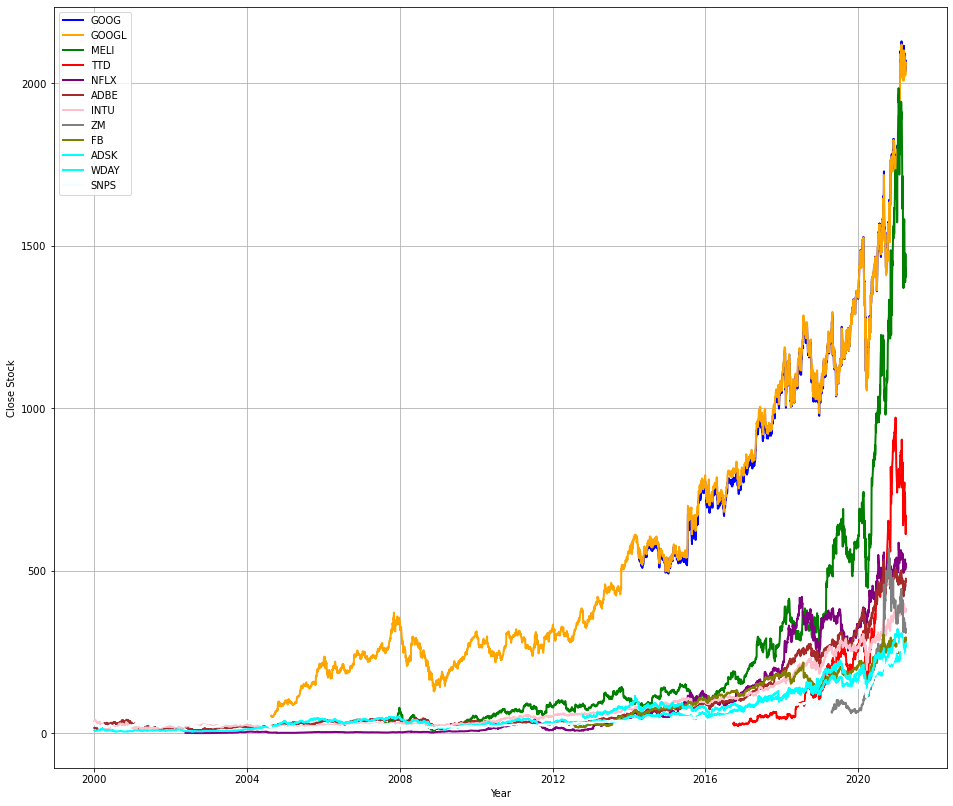

In [272]:
plt.figure(figsize=(16,14))
plt.plot(GOOG, color='blue', label='GOOG')
plt.plot(GOOGL, color='orange', label='GOOGL')
plt.plot(MELI, color='green', label='MELI')
plt.plot(TTD, color='red', label='TTD')
plt.plot(NFLX, color='purple', label='NFLX')
plt.plot(ADBE, color='broWn', label='ADBE')
plt.plot(INTU, color='pink', label='INTU')
plt.plot(ZM, color='gray', label='ZM')
plt.plot(FB, color='olive', label='FB')
plt.plot(ADSK, color='cyan', label='ADSK')
plt.plot(WDAY, color='aqua', label='WDAY')
plt.plot(SNPS, color='azure', label='SNPS')
#plt.plot(PYPL, color='beige', label='PYPL')
#plt.plot(MSFT, color='chartreuse', label='MSFT')
#plt.plot(BIDU, color='coral', label='BIDU')
#plt.plot(TEAM, color='crimson', label='TEAM')
#plt.plot(DOCU, color='fuchsia', label='DOCU')
#plt.plot(ADP, color='gold', label='ADP')
#plt.plot(ABNB, color='indigo', label='ABNB')
plt.xlabel('Year')
plt.ylabel('Close Stock')
plt.legend(loc=2)
plt.show()

In [24]:
### NASDQA TOP 100 Inderstry 정보

In [27]:
pd.read_csv("./edg/chdatas/SYMB_Industry.csv")


,Industry,IndustryCode
0,"건설 장비 및대형차, 기차, 배",521020
1,다양한 소매업,533010
2,레저 상품,532050
3,미디어 및 출판,533020
4,반도체 및 반도체 장비,571010
5,생명과학 및 메디컬 리서치,562020
6,섬유 및 의류,532020
7,소프트웨어 및 IT 서비스,572010
8,식품 및 담배,541020
9,식품 및 약품소매,543010


In [222]:
# 반도체 및 반도체 장비
ASML = fdr.DataReader('ASML', '2000-01-01','2021-03-31')
LRCX = fdr.DataReader('LRCX', '2000-01-01','2021-03-31')
NVDA = fdr.DataReader('NVDA', '2000-01-01','2021-03-31')
AVGO = fdr.DataReader('AVGO', '2000-01-01','2021-03-31')
KLAC = fdr.DataReader('KLAC', '2000-01-01','2021-03-31')
NXPI = fdr.DataReader('NXPI', '2000-01-01','2021-03-31')
TXN = fdr.DataReader('TXN', '2000-01-01','2021-03-31')
#ADI = fdr.DataReader('AID', '2000-01-01','2021-03-31')
MCHP = fdr.DataReader('MCHP', '2000-01-01','2021-03-31')
QCOM = fdr.DataReader('QCOM', '2000-01-01','2021-03-31')
AMAT = fdr.DataReader('AMAT', '2000-01-01','2021-03-31')
#XLNX = fdr.DataReader('XLNL', '2000-01-01','2021-03-31')
MU = fdr.DataReader('MU', '2000-01-01','2021-03-31')
AMD = fdr.DataReader('AMD', '2000-01-01','2021-03-31')
INTC = fdr.DataReader('INTC', '2000-01-01','2021-03-31')
MRVL = fdr.DataReader('MRVL', '2000-01-01','2021-03-31')

<AxesSubplot:xlabel='Date'>

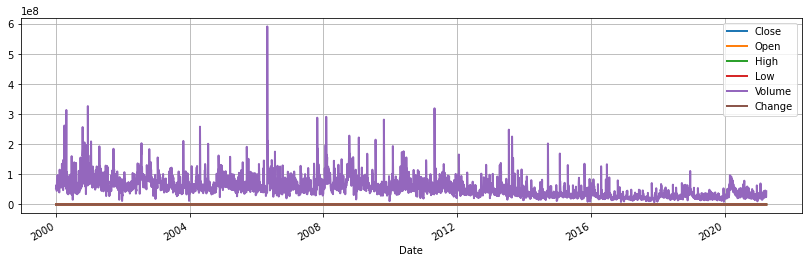

In [190]:
MSFT.plot()

In [131]:
# CLOSE주가 상중하 2샘플
a_AAPL = AAPL['Close']
a_MSFT = MSFT['Close']
b_AMGN = AMGN['Close']
b_ADSK = ADSK['Close']
c_ERIC = ERIC['Close']
c_VOD = VOD['Close']

#소프트웨어 및 IT 서비스


<ipython-input-269-4da97af125f7>:3: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-269-4da97af125f7>:4: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-269-4da97af125f7>:5: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-269-4da97af125f7>:6: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-269-4da97af125f7>:7: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-269-4da97af125f7>:8: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be re

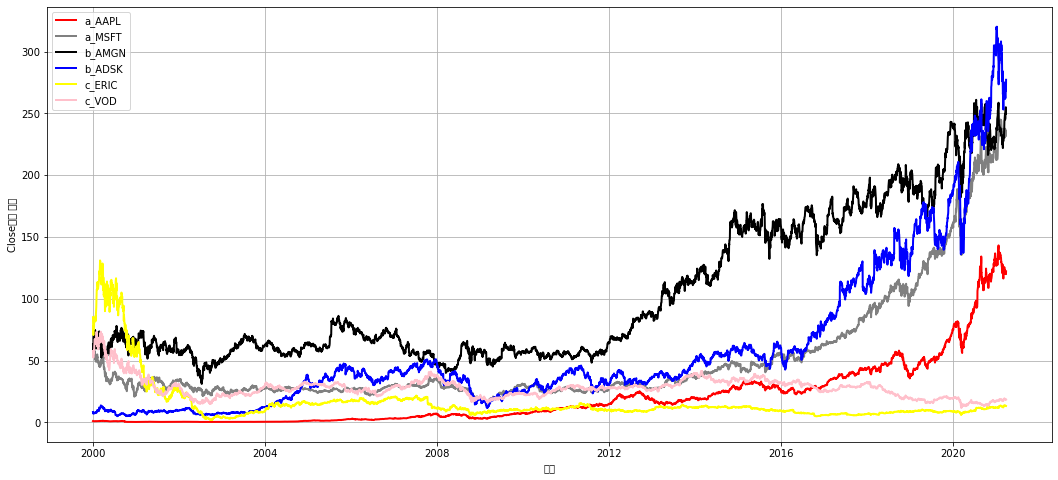

In [269]:
# CLOSE주가 상중하 2샘플
plt.figure(figsize=(18,8))
plt.plot(a_AAPL, Color='red', label='a_AAPL')
plt.plot(a_MSFT, Color='gray', label='a_MSFT')
plt.plot(b_AMGN, Color='black', label='b_AMGN')
plt.plot(b_ADSK, Color='blue', label='b_ADSK')
plt.plot(c_ERIC, Color='yellow', label='c_ERIC')
plt.plot(c_VOD, Color='pink', label='c_VOD')

plt.legend(loc=2)
plt.show()

In [ ]:
nas_list = nas["Symbol"][:3]
todaylist=[]
cnt=0
for i in nas_list:
    data = fdr.DataReader('{}'.format(i),'2021-03-25','2021-03-31').reset_index().to_dict("records")[0]
    data["ticker"] = i
    todaylist.append(data)
    cnt+=1
    print(cnt,":",i," ", todaylist)
result = pd.DataFrame(todaylist)
result

In [ ]:
nas_list = nas["Symbol"][:1]
todaylist=[]
cnt=0
for i in nas_list:
    x= fdr.DataReader('{}'.format(i),'2020-03-25','2021-03-31')
    todaylist.append(x)
todaylist

In [ ]:
##WAR DATA
